https://stackoverflow.com/questions/30530001/python-pandas-time-series-interpolation-and-regularization  
https://stackoverflow.com/questions/40085300/how-to-smooth-lines-in-a-figure-in-python/40115645  

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.interpolate import interp1d

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

import seaborn as sns

In [2]:
sns.set()
pd.options.display.float_format = '{:.2f}'.format

In [3]:
def wide_to_long(df, pivot=None):

    df_long = pd.melt(df, 
                      id_vars=[pivot] if pivot is not None else None,  
                      value_vars=[e for e in df.columns if e!=pivot])
    
    return df_long

1

In [4]:
data = pd.DataFrame()
data['timestamp'] = pd.to_datetime(['08:29:05',
                                    '08:34:05',
                                    '08:39:05',
                                    '08:44:05',
                                    '08:49:05'])
data['raw'] = [271238, 329285, np.nan, 260260, 263711]

In [5]:
data = data.set_index('timestamp')
data = data.resample(rule='T').mean()

data['linear'] = data['raw'].interpolate(method='time')
data['spline'] = data['raw'].interpolate(method='spline', order=3)

data = data.reset_index()

In [6]:
data.head()

,timestamp,raw,linear,spline
0,2021-11-22 08:29:00,271238.00,271238.00,271238.00
1,2021-11-22 08:30:00,NaN,282847.40,292656.77
2,2021-11-22 08:31:00,NaN,294456.80,308648.76
3,2021-11-22 08:32:00,NaN,306066.20,319736.06
4,2021-11-22 08:33:00,NaN,317675.60,326440.78


In [7]:
data = wide_to_long(data, pivot='timestamp')

<AxesSubplot:xlabel='timestamp', ylabel='value'>

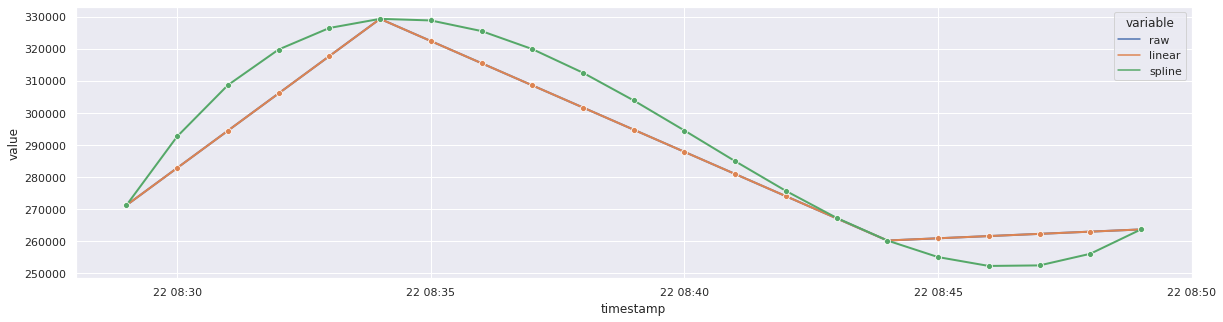

In [8]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

sns.lineplot(data=data,
             x='timestamp', 
             y='value', 
             hue='variable', 
             lw=2, 
             marker='o')

2

In [9]:
data = pd.DataFrame()
data['timestamp'] = [ pd.Timestamp(year=2005, month=1, day=1, hour=0), 
                      pd.Timestamp(year=2015, month=1, day=1, hour=0), 
                      pd.Timestamp(year=2030, month=1, day=1, hour=0), 
                      pd.Timestamp(year=2031, month=1, day=1, hour=0)]
data['raw'] = [80, 65,  60 , 59]

In [10]:
linear_interp = interp1d(data['timestamp'].dt.year, data['raw'], kind='linear')
cubic_interp = interp1d(data['timestamp'].dt.year, data['raw'], kind='cubic')

data = data.set_index('timestamp')
data = data.resample(rule='Y').mean()
data = data.reset_index()

data['linear'] = data.apply(lambda x: float(linear_interp(x['timestamp'].year)), axis=1)
data['cubic'] = data.apply(lambda x: float(cubic_interp(x['timestamp'].year)), axis=1)

In [11]:
data.head()

,timestamp,raw,linear,cubic
0,2005-12-31,80.00,80.00,80.00
1,2006-12-31,NaN,78.50,77.35
2,2007-12-31,NaN,77.00,75.00
3,2008-12-31,NaN,75.50,72.95
4,2009-12-31,NaN,74.00,71.17


In [12]:
data = wide_to_long(data, pivot='timestamp')

<AxesSubplot:xlabel='timestamp', ylabel='value'>

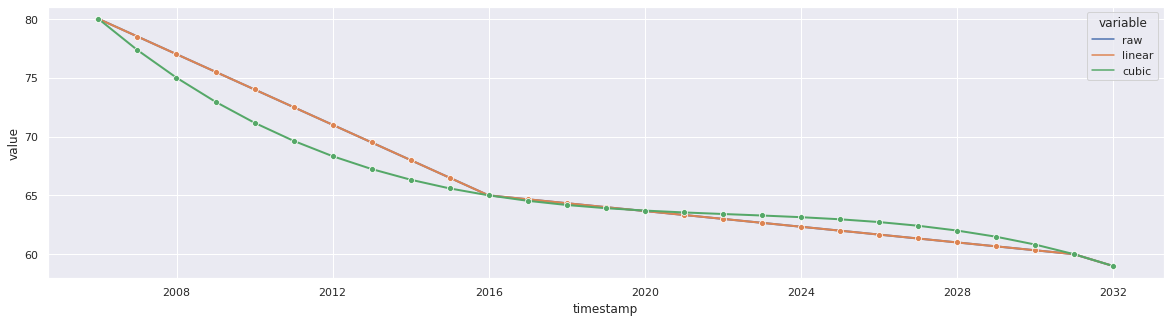

In [13]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(1, 1, 1)

sns.lineplot(data=data,
             x='timestamp', 
             y='value', 
             hue='variable', 
             lw=2, 
             marker='o')